In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
from sklearn.tree import export_graphviz
from IPython.display import SVG

# You may need to install the Python graphviz library. At the command line:
#   pip install graphviz
# You will also need to install the graphviz executables. You can use apt,
# macports, or other installer for your system.
from graphviz import Source

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank.csv")
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

## One Hot Encode and Prepare the data

In [3]:
X = df.drop('deposit', axis=1)  # Drop the target variable to get the features
y = df['deposit']  # Select only the target variable

# Display the original DataFrame
# print("Original DataFrame:")
# print(df.head())
display(X.columns)
display(X.head())

# Perform one-hot encoding on the features
X = pd.get_dummies(X, dtype=int)

# campaign is a categorical variable, so we need to perform one-hot encoding on it
campaign = pd.get_dummies(X.campaign, prefix='campaign', dtype=int)
dropped = X.drop('campaign', axis=1)

# combine the one-hot encoded campaign with the original features
X = pd.concat([dropped, campaign], axis=1)
continuous_features = X[['age','balance', 'day', 'duration', 'pdays']]

for column in continuous_features:
    X[column] = (X[column] - X[column].mean()) / X[column].std()

X.head()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


,age,balance,day,duration,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,campaign_27,campaign_28,campaign_29,campaign_30,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63
0,1.491438,0.252514,-1.265689,1.930139,-0.481162,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.239620,-0.459953,-1.265689,3.154470,-0.481162,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.019470,-0.080157,-1.265689,2.929770,-0.481162,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.155681,0.293749,-1.265689,0.596339,-0.481162,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.071742,-0.416858,-1.265689,0.867132,-0.481162,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
for column in X:
    X[column] = (X[column] - X[column].mean()) / X[column].std()

In [5]:
print("The features (i.e., the X variable) is now set up", X)
print("The y variable is now set", y)

The features (i.e., the X variable) is now set up             age   balance       day  duration     pdays  previous  job_admin.  \
0      1.491438  0.252514 -1.265689  1.930139 -0.481162 -0.363244    2.714158   
1      1.239620 -0.459953 -1.265689  3.154470 -0.481162 -0.363244    2.714158   
2     -0.019470 -0.080157 -1.265689  2.929770 -0.481162 -0.363244   -0.368405   
3      1.155681  0.293749 -1.265689  0.596339 -0.481162 -0.363244   -0.368405   
4      1.071742 -0.416858 -1.265689  0.867132 -0.481162 -0.363244    2.714158   
...         ...       ...       ...       ...       ...       ...         ...   
11157 -0.690984 -0.473595  0.515627 -0.331272 -0.481162 -0.363244   -0.368405   
11158 -0.187348 -0.246647  0.040610 -0.832527 -0.481162 -0.363244   -0.368405   
11159 -0.774923 -0.464914  0.396873 -0.622230 -0.481162 -0.363244   -0.368405   
11160  0.148409 -0.473905 -0.909426 -1.045705  1.109521  1.818250   -0.368405   
11161 -0.607045 -0.473905 -0.790671  0.737497 -0.481162 -0.

In [6]:
print(X.columns)

Index(['age', 'balance', 'day', 'duration', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'campaign_1', 'campaign_2', 'campaign_3',
       'campaign_4', 'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8',
       

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X.values, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

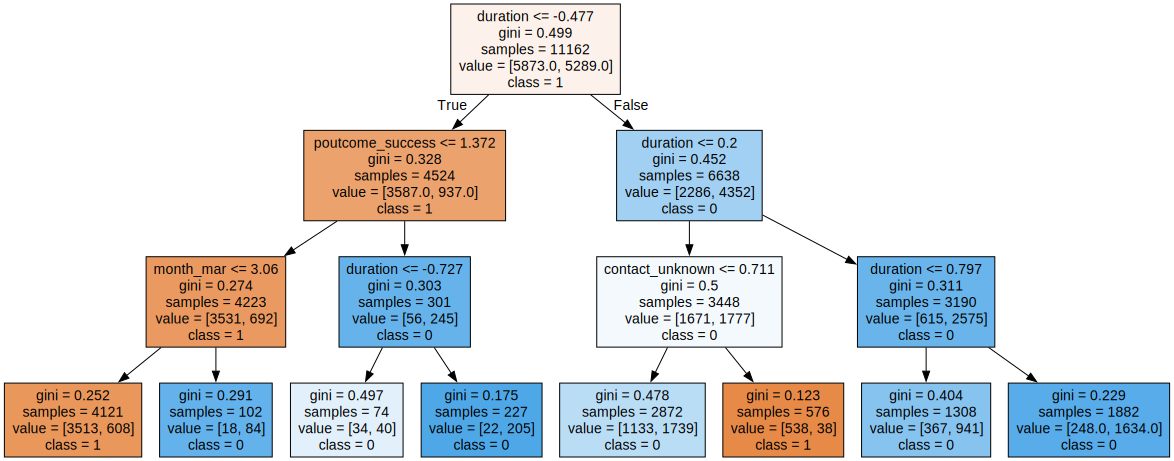

In [8]:
classNames = y.unique().astype(str)
dot = tree.export_graphviz(treeclf, out_file=None,
                           feature_names=X.columns,
                           class_names=classNames, 
                           filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

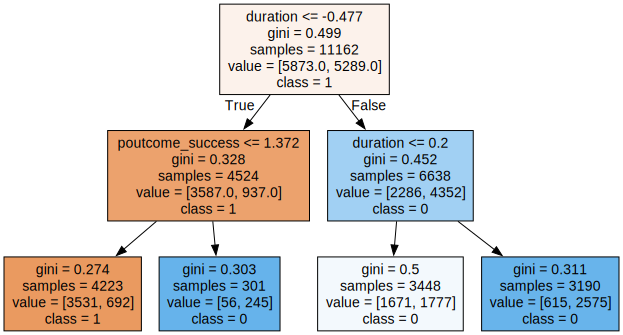

In [9]:
treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
treeclf.fit(X.values, y)
classNames = y.unique().astype(str)
dot = tree.export_graphviz(treeclf, out_file=None,
                           feature_names=X.columns,
                           class_names=classNames, 
                           filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)